In [3]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [5]:
os.chdir('/Users/ben/Desktop/LSR')

In [7]:
entire_data = pd.read_csv('(original)hash_true_round_PNe.csv')

In [ ]:
#Search for and make into a list of RA and DEC of PNe
pn_ra = np.array(entire_data.RAJ2000.dropna())
pn_dec = np.array(entire_data.DECJ2000.dropna())

pn_ra = pn_ra.flatten()
pn_dec = pn_dec.flatten()

pn_spaces = []
for i in range(len(pn_dec)):
    pn_spaces.append(" ")
spaces = np.array(pn_spaces)
pn_coords = pn_ra + pn_spaces + pn_dec

#Search for and make into a list of RA and DEC of PNe that has avalible data in TESS
tess_pn_coords = []
for i in pn_coords:
    index = i
    try:
        search_lcf = lk.search_lightcurve(index, author="SPOC", exptime = 120)
        lcf = search_lcf.download_all()
        ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
        lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");
        tess_pn_coords.append(index)
    except TypeError:
        continue

No data found for target "17:53:35.27 -28:28:50.9".
/Users/ben/Library/Python/3.8/lib/python/site-packages/lightkurve/search.py:475: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
No data found for target "17:37:51.14 -25:20:45.3".
/Users/ben/Library/Python/3.8/lib/python/site-packages/lightkurve/search.py:475: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
No data found for target "17:27:53.68 -22:57:18.6".
/Users/ben/Library/Python/3.8/lib/python/site-packages/lightkurve/search.py:475: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
No data found for target "17:45:36.76 -23:02:26.1".
/Users/ben/Library/Python/3.8/lib/python/site-packages/lightkurve/search.py:475: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
No data found for target "18:13:40.60 -26:08:39.4".
/Users/ben/Library/Python/3.8/lib/python/site-packages/lightkurve/search.py:475: LightkurveW

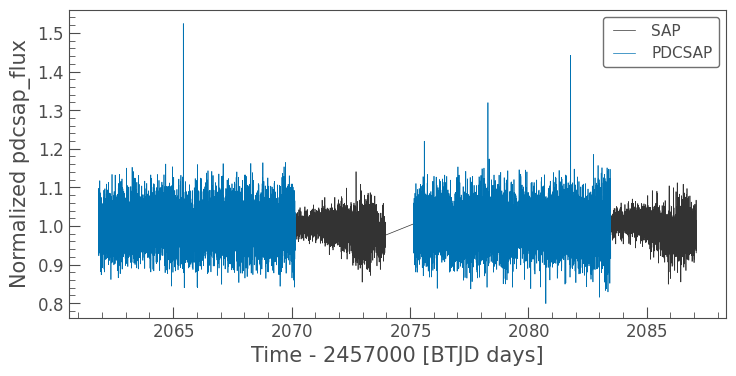

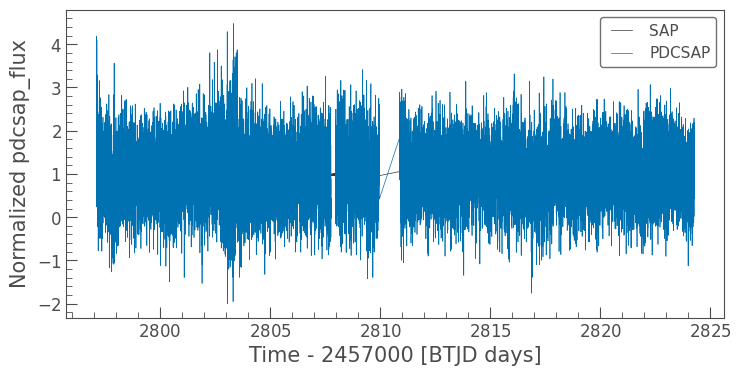

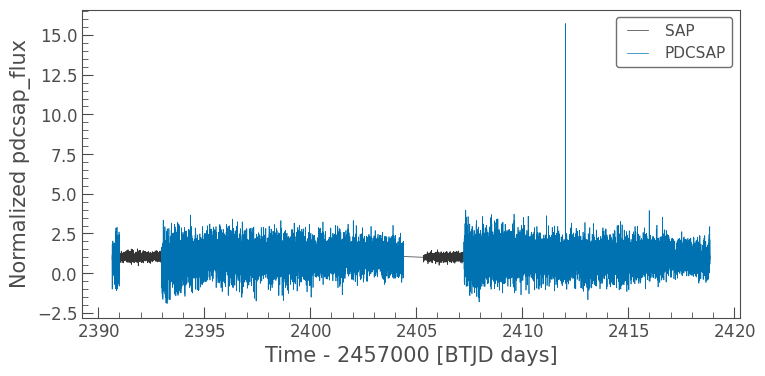

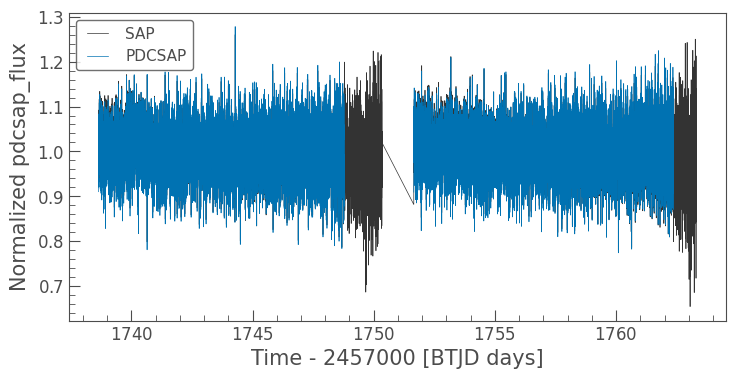

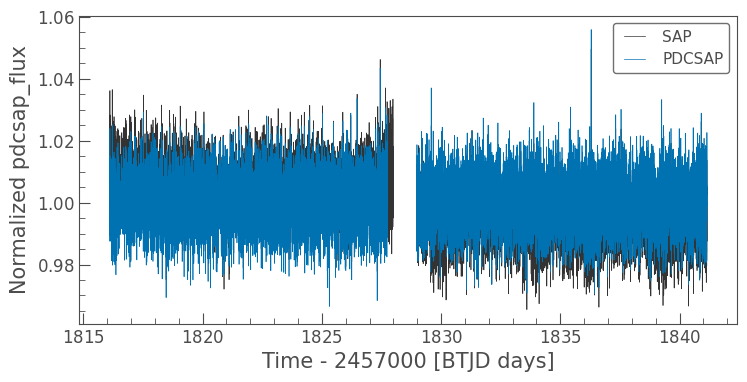

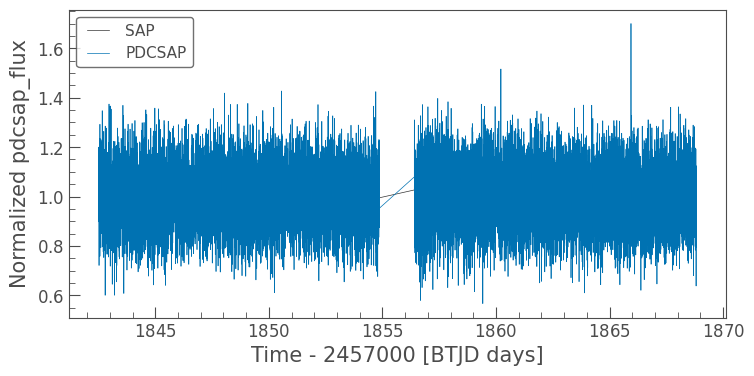

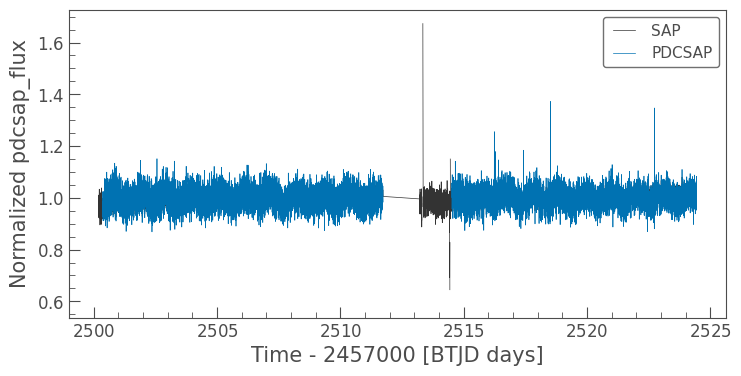

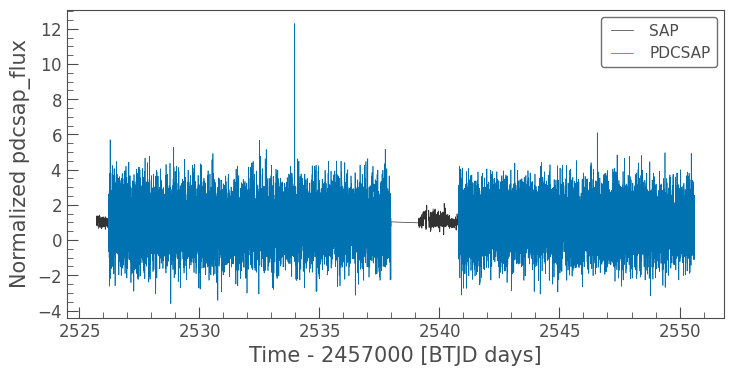

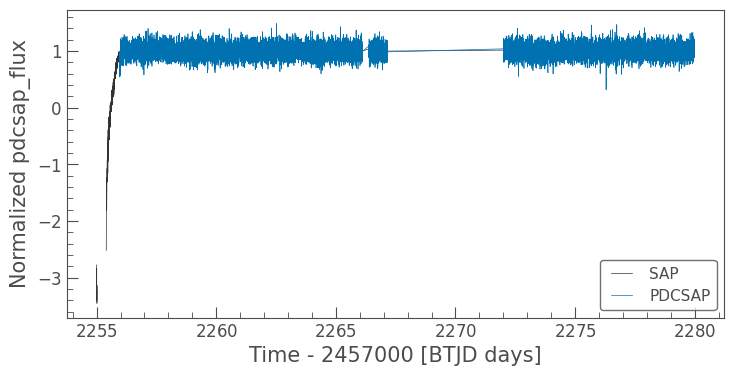

In [9]:
#Search for and make into a list of RA and DEC of CSPNe 
cspn_ra = np.array(entire_data.CS_RAJ2000.dropna())
cspn_dec = np.array(entire_data.CS_DECJ2000.dropna())

cspn_ra = cspn_ra.flatten()
cspn_dec = cspn_dec.flatten()

cspn_spaces = []
for i in range(len(cspn_dec)):
    cspn_spaces.append(" ")
cspn_spaces = np.array(cspn_spaces)
cspn_coords = cspn_ra + cspn_spaces + cspn_dec

#Search for and make into a list of RA and DEC of CSPNe that has avalible data in TESS
tess_cspn_coords = []
for i in cspn_coords:
    index = i
    try:
        search_lcf = lk.search_lightcurve(index, author="SPOC", exptime = 120)
        lcf = search_lcf.download_all()
        ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
        lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");
        tess_cspn_coords.append(index)
    except TypeError:
        continue

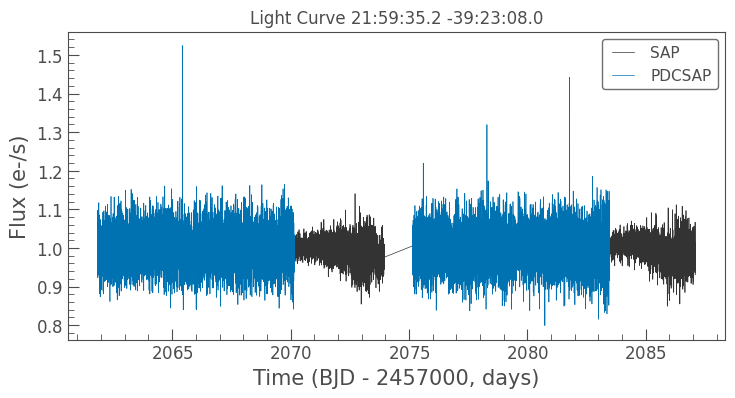

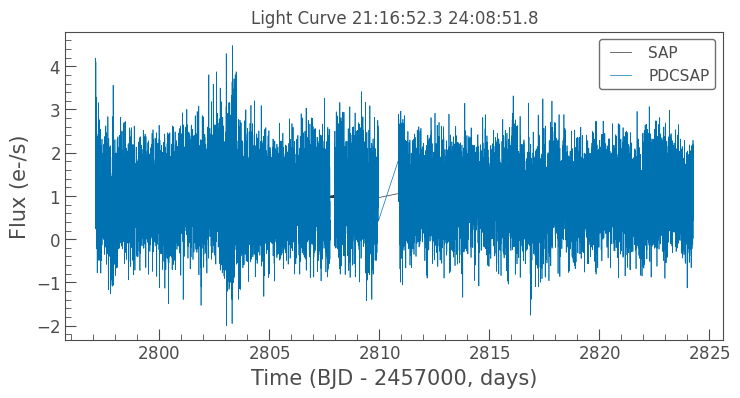

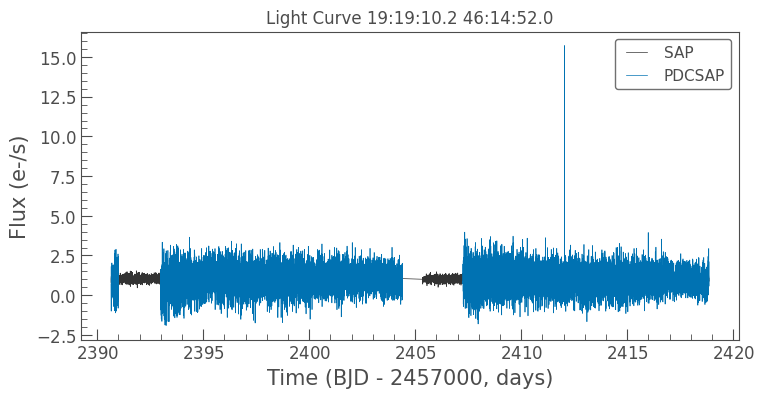

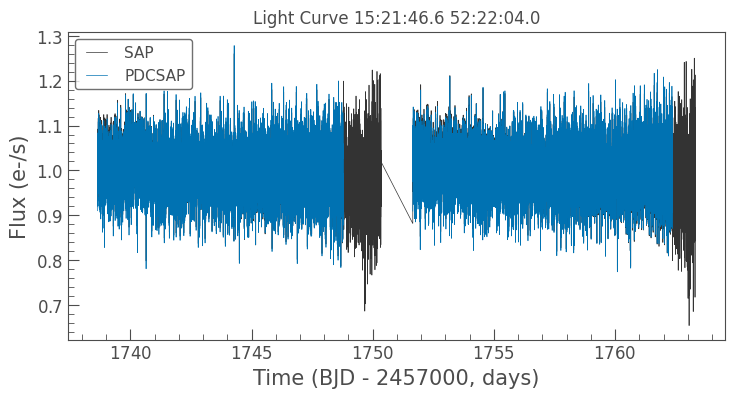

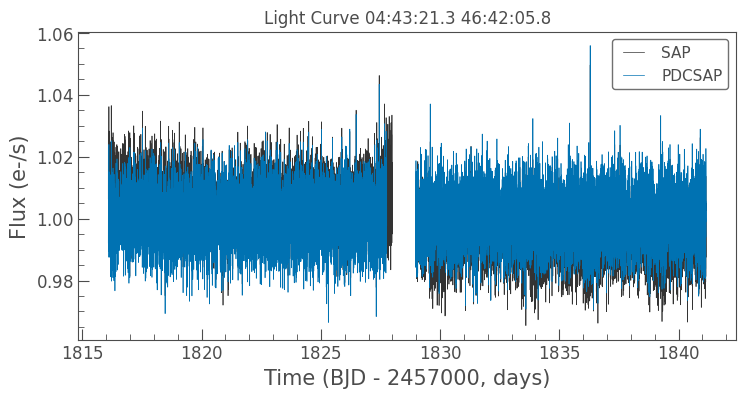

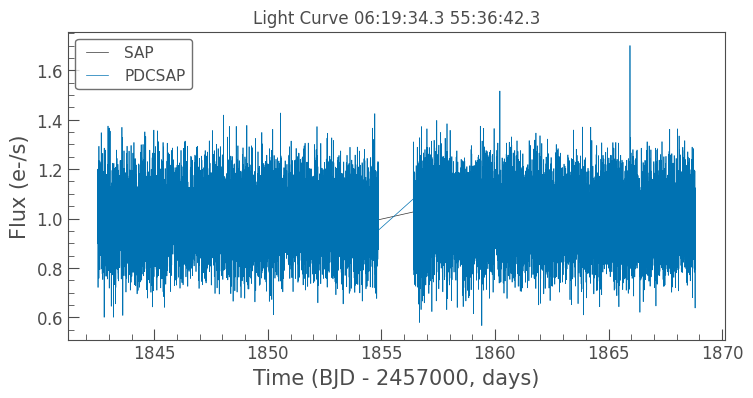

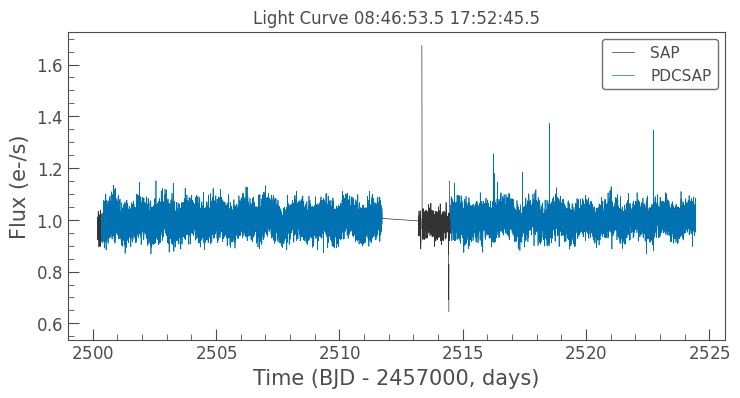

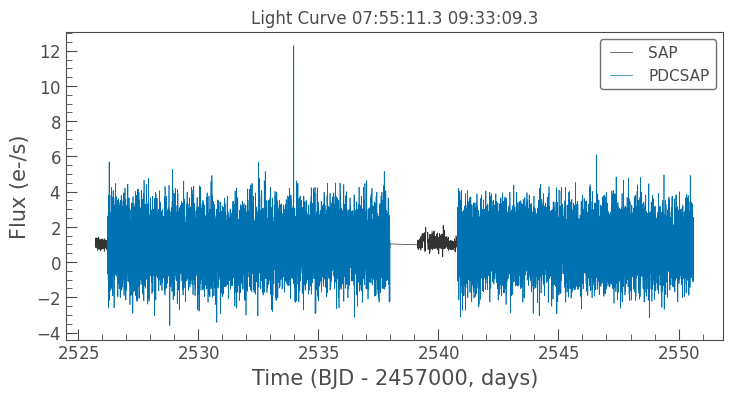

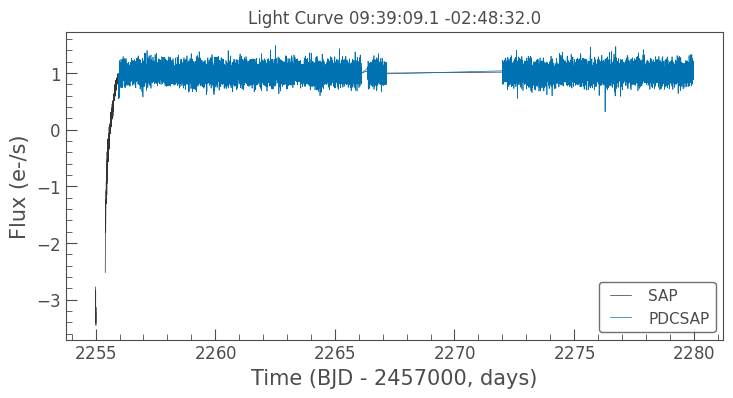

In [10]:
#Plot all avalible LC of PNe/CSPNe
for i in tess_cspn_coords:
    index = i
    try:
        search_lcf = lk.search_lightcurve(index, author="SPOC", exptime = 120)
        lcf = search_lcf.download_all()
        ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
        lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

        ax.set_title("Light Curve " + index)
        ax.set_ylabel("Flux (e-/s)")
        ax.set_xlabel("Time (BJD - 2457000, days)")
        ax.set_ylim()

        plt.show()
     
    except TypeError:
        continue